#Projekt Indywidualny - Python w Analizie Danych
**Wykonał: Filip Koźlik**\
**Informatyka NS RMS sem. V**

Dane do projektu zostały pobrane z użyciem modułu scrapy. \
Strona danych: https://www.worldometers.info/world-population/population-by-country/

**Opis użytych importów**
1. pandas - operacje na ramkach danych,
2. numpy - podstawowe operacje matematyczne,
3. matplotlib.pyplot - wizualizacja danych,
4. seaborn - wizualizacja danych.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Format wyświetlanie float'ów

In [84]:
pd.options.display.float_format = '{:.2f}'.format

Wczytanie pliku __data.json__

In [85]:
df = pd.read_json('data.json')

In [86]:
df.head()

,countries,population,density,land_area,ferility_rate,med_age,urb_pop
0,None,None,None,None,None,None,None
1,China,1439323776,153,9388211,1.7,38,61
2,India,1380004385,464,2973190,2.2,28,35
3,United States,331002651,36,9147420,1.8,38,83
4,Indonesia,273523615,151,1811570,2.3,30,56


Opis kolumn w pliku __data.json__:
1. **countries** - nazwa kraju,
2. **population** - populacja kraju,
3. **density** - zagęszczenie (ilość osób/ km<sup>2</sup>),
4. **land_area** - powierzchnia w km<sup>2</sup>,
5. **fertility_rate** - średnia liczba dzieci w rodzinie,
6. **med_age** - mediana wieku w danym kraju,
7. **urb_pop** - % ludzi, którzy żyją w miastach w danym kraju.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   countries      235 non-null    object
 1   population     236 non-null    object
 2   density        236 non-null    object
 3   land_area      236 non-null    object
 4   ferility_rate  235 non-null    object
 5   med_age        235 non-null    object
 6   urb_pop        236 non-null    object
dtypes: object(7)
memory usage: 13.0+ KB


**Podstawowe informacje odnośnie ramki danych**

In [88]:
df.describe()

,countries,population,density,land_area,ferility_rate,med_age,urb_pop
count,235,236,236,236,235,235,236
unique,235,236,166,227,51,35,82
top,Curaçao,1701575,25,460,N.A.,N.A.,N.A.
freq,1,1,8,3,34,34,13


#Oczyszczanie danych

**Porzucenie wartości pustych**

In [89]:
df.loc[df.countries.isna()]

,countries,population,density,land_area,ferility_rate,med_age,urb_pop
0,None,None,None,None,None,None,None


In [90]:
df = df.dropna(subset=['countries'])

In [91]:
df.rename(columns={'ferility_rate':'fertility_rate'}, inplace=True)

In [92]:
df.head()

,countries,population,density,land_area,fertility_rate,med_age,urb_pop
1,China,1439323776,153,9388211,1.7,38,61
2,India,1380004385,464,2973190,2.2,28,35
3,United States,331002651,36,9147420,1.8,38,83
4,Indonesia,273523615,151,1811570,2.3,30,56
5,Pakistan,220892340,287,770880,3.6,23,35


**Porzucenie wartości wypełnionych stringami 'N.A.'**

In [93]:
for col in df.columns:
  df.drop(df.query(f"{col} == 'N.A.'").index, inplace = True)

**Zamiana typu kolumn**

In [94]:
for col in df.columns:
  if col != 'countries':
    df[col] = pd.to_numeric(df[col])

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 1 to 201
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   countries       194 non-null    object 
 1   population      194 non-null    int64  
 2   density         194 non-null    int64  
 3   land_area       194 non-null    int64  
 4   fertility_rate  194 non-null    float64
 5   med_age         194 non-null    int64  
 6   urb_pop         194 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 12.1+ KB


In [96]:
df.reset_index(drop=True, inplace=True)

#Wizualizacja i wnioski

**Macierz korelacji**

In [128]:
df.corr().style.background_gradient()

,population,density,land_area,fertility_rate,med_age,urb_pop
population,1.000000,0.040462,0.447208,-0.056811,0.028657,-0.045453
density,0.040462,1.000000,-0.151990,-0.165663,0.129078,0.006848
land_area,0.447208,-0.151990,1.000000,-0.056223,0.077940,0.128382
fertility_rate,-0.056811,-0.165663,-0.056223,1.000000,-0.882105,-0.485951
med_age,0.028657,0.129078,0.077940,-0.882105,1.000000,0.534106
urb_pop,-0.045453,0.006848,0.128382,-0.485951,0.534106,1.000000


**Znalezienie 10 największych gęstości zaludnień.**

In [98]:
largest_density = df.nlargest(10, 'density')

In [99]:
largest_density

,countries,population,density,land_area,fertility_rate,med_age,urb_pop
146,Bahrain,1701575,2239,760,2.00,32,89
167,Maldives,540544,1802,300,1.90,30,35
168,Malta,441543,1380,320,1.50,43,93
7,Bangladesh,164689383,1265,130170,2.10,28,39
183,Channel Islands,173863,915,190,1.50,43,30
117,State of Palestine,5101414,847,6020,3.70,21,80
166,Micronesia,548914,784,700,2.90,27,68
179,Mayotte,272815,728,375,3.70,20,46
55,Taiwan,23816775,673,35410,1.20,42,79
176,Barbados,287375,668,430,1.60,40,31


**Zestawienie 10 największych zaludnień**

Import plotly.express w celu uzyskania interaktywnego wykresu.

In [100]:
import plotly.express as px
fig = px.bar(largest_density, x="countries", y="density", 
             color="density", title=r'$Zestawienie \; krajów \; z \; największym \; zagęszczeniem \; na \; \text{ km }^{2}$')
fig.show()

__locality_type__ reprezentuje, czy w danym kraju więcej osób żyje w miastach lub na wsi

In [101]:
df['locality_type'] = np.where(df.urb_pop > 50, 'city', 'village')

In [102]:
df.head()

,countries,population,density,land_area,fertility_rate,med_age,urb_pop,locality_type
0,China,1439323776,153,9388211,1.70,38,61,city
1,India,1380004385,464,2973190,2.20,28,35,village
2,United States,331002651,36,9147420,1.80,38,83,city
3,Indonesia,273523615,151,1811570,2.30,30,56,city
4,Pakistan,220892340,287,770880,3.60,23,35,village


In [103]:
locality_type_agg = pd.crosstab(index = df.med_age, columns = df.locality_type)
locality_type_agg.head()

locality_type,city,village
med_age,,
15,0,1
16,0,1
17,1,5
18,2,8
19,6,8


**Heatmapa oddająca ilość miast/wsi dla mediany wieku**

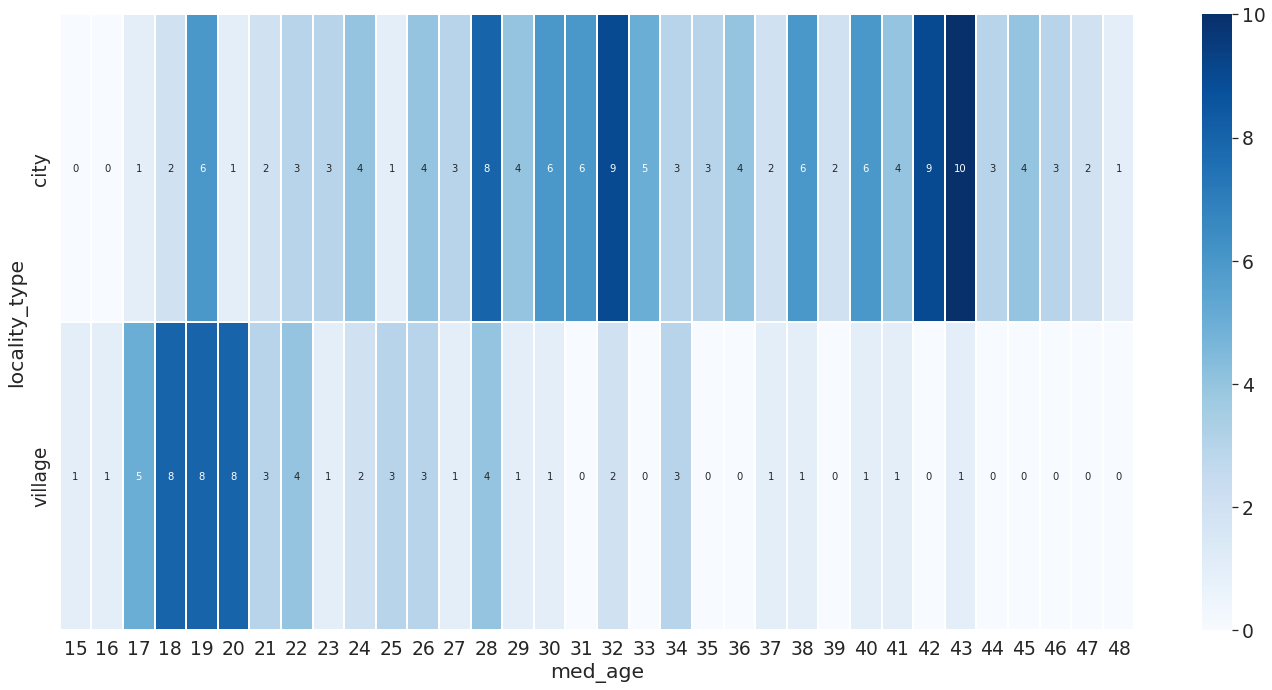

In [104]:
plt.figure(figsize=(20,10))
sns.heatmap(locality_type_agg.T, annot=True, cmap='Blues', linewidths=1)
sns.set(font_scale= 1.7)
plt.tight_layout()
plt.show()

#Klasyfikacja, z użyciem KNN 

**Podział zbioru**

In [105]:
data = df.iloc[:, 4:6]
target = df.iloc[:,7]

print(f'data shape: {data.shape}')
print(f'targer shape: {target.shape}')

data shape: (194, 2)
targer shape: (194,)


**Wykres rozproszenia**

In [106]:
data.head()

,fertility_rate,med_age
0,1.70,38
1,2.20,28
2,1.80,38
3,2.30,30
4,3.60,23


In [107]:
import plotly.express as px
plot_data_df = pd.DataFrame(data, columns=['fertility_rate', 'med_age'])
plot_target_df = pd.DataFrame(target, columns=['locality_type'])
plot_df = pd.concat([plot_data_df, plot_target_df], axis=1)
plot_df.head()
px.scatter(plot_df, x='fertility_rate', y='med_age', color='locality_type', width=800, height=500, 
           title= 'Wykres rozproszenia wsp. dzietności od mediany wieku')

In [123]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(data.values, target.values)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier()

In [124]:
accuracy = classifier.score(data.values, target.values)
accuracy = round(accuracy * 100, 2)
print(f'Skuteczność dla klasyfikacji przy 5 sąsiadach: {accuracy} %')

Skuteczność dla klasyfikacji przy 5 sąsiadach: 80.41 %


**Test skuteczności dla n sąsiadów**

In [110]:
max_neighbors = 10
for i in range(1,10):
  test_classifier = KNeighborsClassifier(n_neighbors= i)
  test_classifier.fit(data, target)
  test_accuracy = test_classifier.score(data, target)
  test_accuracy = round(test_accuracy * 100, 2)
  print(f'Skuteczność dla {i} sąsiadów wynosi: {test_accuracy} %')

Skuteczność dla 1 sąsiadów wynosi: 91.24 %
Skuteczność dla 2 sąsiadów wynosi: 83.51 %
Skuteczność dla 3 sąsiadów wynosi: 84.02 %
Skuteczność dla 4 sąsiadów wynosi: 81.96 %
Skuteczność dla 5 sąsiadów wynosi: 80.41 %
Skuteczność dla 6 sąsiadów wynosi: 79.9 %
Skuteczność dla 7 sąsiadów wynosi: 79.9 %
Skuteczność dla 8 sąsiadów wynosi: 78.87 %
Skuteczność dla 9 sąsiadów wynosi: 78.35 %


**Wykres granic decyzyjnych**

In [117]:
import numpy as np
#target = target.to_frame()
target['locality_type'] = np.where(target.locality_type == 'city', 1, 0)
target

,locality_type
0,1
1,0
2,1
3,1
4,0
...,...
189,0
190,0
191,1
192,1


In [118]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   locality_type  194 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


**Wykres Granic decyzyjnych dla n=5**

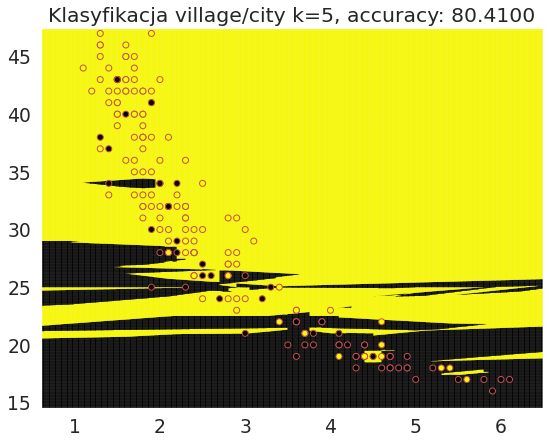

In [127]:
x_min, x_max = data.iloc[:, 0].min() - 0.5, data.iloc[:, 0].max() - 0.5
y_min, y_max = data.iloc[:, 1].min() - 0.5, data.iloc[:, 1].max() - 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()] #Konkatenacja spłaszczonej tablicy xx, yy
Z = classifier.predict(mesh) 
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9,7))
plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=target.locality_type, cmap='gnuplot', edgecolors='r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'Klasyfikacja village/city k=5, accuracy: {accuracy:.4f}')
plt.show()